# NLP Tutorial - Sentiment Analysis using Scikit Sklearn Python on IMDB Dataset

# Install Dependencies
- pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
- pip install spacy
- from spacy.cli import download  # line 1
- download("en_core_web_sm")  - # line 2
- pip install beautifulsoup4==4.9.1
-  import spacy
from spacy.lang.en.examples import sentences pip install textblob==0.15.3

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dython
from datetime import datetime
from dateutil import parser
import openpyxl
import spacy

In [6]:
df = pd.read_excel('train.xlsx')
df

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg
...,...,...
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg


### TFIDF  = term frequency–inverse document frequency

# Preprocessing

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import preprocess_kgptalkie as ps  # import the cleaning package

## Removing stopwords

In [ ]:
# removing stopword
stopwords = list(stopwords)
df.Reviews = df.Reviews.apply(lambda x: [item for item in x if item not in stopwords])

In [9]:
df.Reviews

0        When I first tuned in on this morning news, I ...
1        Mere thoughts of "Going Overboard" (aka "Babes...
2        Why does this movie fall WELL below standards?...
3        Wow and I thought that any Steven Segal movie ...
4        The story is seen before, but that does'n matt...
                               ...                        
24995    Everyone plays their part pretty well in this ...
24996    It happened with Assault on Prescient 13 in 20...
24997    My God. This movie was awful. I can't complain...
24998    When I first popped in Happy Birthday to Me, I...
24999    So why does this show suck? Unfortunately, tha...
Name: Reviews, Length: 25000, dtype: object

# Cleaning the texts of special characters

In [11]:
import preprocess_kgptalkie as ps  # import the cleaning package
import re # regular expression

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [12]:
# loading spacy for stop word removal
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

In [13]:
df.Reviews = df.Reviews.apply(lambda x: get_clean(x))

In [14]:
df.Reviews

0        when i first tuned in on this morning news i t...
1        mere thoughts of going overboard aka babes aho...
2        why does this movie fall well below standards ...
3        wow and i thought that any steven segal movie ...
4        the story is seen before but that doesand matt...
                               ...                        
24995    everyone plays their part pretty well in this ...
24996    it happened with assault on prescient 13 in 20...
24997    my god this movie was awful i cannot complain ...
24998    when i first popped in happy birthday to me i ...
24999    so why does this show suck unfortunately that ...
Name: Reviews, Length: 25000, dtype: object

# Converting the text into numeric

In [22]:
tfidf = TfidfVectorizer(max_features = 5000, ngram_range =(1,2))

In [23]:
X = df['Reviews']
y = df['Sentiment']

In [24]:
# tranforming data to sparse matrix
X = tfidf.fit_transform(X)

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

# Instantiating or fitting the model

In [27]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
print(clf.get_params())

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


# Testing the Model

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_pred

array(['pos', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

# Classification Report

In [30]:
print( classification_report (y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      2600
         pos       0.86      0.88      0.87      2400

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



# Confusion matrix

In [31]:
confusion = confusion_matrix(y_test, y_pred)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

<BarContainer object of 4 artists>

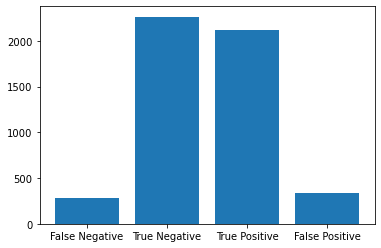

In [32]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])

# Accuracy Score

In [33]:
clf.score(X_test, y_test)

0.8764

In [34]:
accuracy_score(y_test, y_pred)

0.8764

# Now lets predict on the custom data set

In [35]:
x = 'this movie was bad'
x = get_clean(x)
vec = tfidf.transform([x])

In [36]:
vec

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [37]:
# now to test

clf.predict(vec)

array(['neg'], dtype=object)

# Saving the model

In [38]:
import pickle

In [39]:
pickle.dump(clf, open('prediction.pkl', 'wb'))

# Loading the model

In [40]:
loaded_model = pickle.load(open('prediction.pkl', 'rb'))

In [41]:
df_test = pd.read_excel('test.xlsx')

# Testing the model on a new dataset

In [42]:
df_test[:5]

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


# Preprocesisng to clean the model

In [43]:
# lets clean thew review column and appy get_clean
df_test['Reviews'] = df_test['Reviews'].apply(lambda x: get_clean(x))


In [44]:
reviews = df_test['Reviews']

# Transforming the model

In [45]:
testing = tfidf.fit_transform(reviews)

In [46]:
testing

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3971382 stored elements in Compressed Sparse Row format>

In [47]:
testing_pred = loaded_model.predict(testing)

In [48]:
df_testing = pd.DataFrame(testing_pred, columns = ['Predicted_Sentiment'])
df_testing.head()   

,Predicted_Sentiment
0,pos
1,pos
2,neg
3,pos
4,neg


# Concat the dataset with predicted model

In [49]:
testing_dataset = pd.concat([df_test, df_testing], ignore_index = False, axis =1)

In [50]:
testing_dataset.head()

,Reviews,Sentiment,Predicted_Sentiment
0,who would have thought that a movie about a ma...,pos,pos
1,after realizing what is going on around us in ...,pos,pos
2,i grew up watching the original disney cindere...,neg,neg
3,david mamet wrote the screenplay and made his ...,pos,pos
4,admittedly i did not have high expectations of...,neg,neg


In [51]:
original = testing_dataset.Sentiment.value_counts()

In [52]:
predicted = testing_dataset.Predicted_Sentiment.value_counts()

In [53]:
conc = pd.concat ([original,predicted], axis = 1)

In [54]:
conc

,Sentiment,Predicted_Sentiment
pos,12500,12609
neg,12500,12391


<AxesSubplot:>

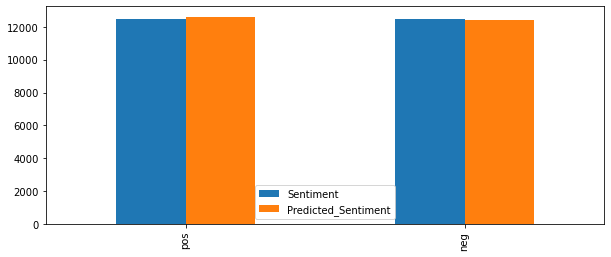

In [55]:
fig,ax = plt.subplots(figsize = (10,4))
conc.plot(kind ='bar', ax= ax)
